![dsl_logo](dsl_logo.png)


# Sci Hub Usage in Niagara
## A Data Science case study

This tutorial is meant to give you an introduction to the main ideas behind data science by analyzing usage logs of the Sci-Hub website in the Niagara region using the Python programming language. This tutorial is presented in a Jupyter notebook that blends code into web pages. Please feel free to run through this on your own.

Jupyter Notebooks are pretty easy to use. They have code 'cells' that allow you to enter and run code. Let's demonstrate. Click in the box below and hit the _Run_ button on the left side. (It looks like a circle with a triangle in it) 



In [2]:
#Let's just print a basic message
print("Welcome to our Data Science Tutorial")

Welcome to our Data Science Tutorial


## Background info


![scihub_log](https://upload.wikimedia.org/wikipedia/fr/c/c4/Sci-Hub_logo.png)

SciHub is a resource that a person can use to download Academic PDFs. There is some controversy with it however. Periodically the owner of the site releases usage logs that curious people like us can review. The most recent [log file](https://zenodo.org/record/1158301) is from 2017. We are going to explore this data to see if we can spot anything interesting. At the same time we're going to learn some [Python](https://www.python.org/), in particular the [Panadas Library](https://pandas.pydata.org/) and a visualization library called [Matplotlib](https://matplotlib.org/)


## Loading the Libraries and the data

Our first step is to get Python ready and to load the datafile. The next cell will take care of that.

In [1]:
#Our Libraries
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

#Loading our Data
f = open("sc_use.tab", "r")
data = pd.read_csv("sc_use.tab",sep="\t")

#Tell pandas what col
data.columns = ["date","doi","Pub_code","User_code","country","city","lat","long"]
data = data.sort_values(by = "date", ascending = False)

## Pandas

### Load usage file into a Pandas dataframe

We'll also tell it what the columns of our data are

### How can we view the first 10 entries in the data using head()

In [3]:
data.head()


,date,doi,Pub_code,User_code,country,city,lat,long
3744,2017-12-30 02:11:20,10.1109/MSP.2014.2329397,17149789,46591555,Canada,Saint Catharines,43.159374,-79.246863
3743,2017-12-29 01:50:42,10.1111/j.1462-2920.2012.02747.x,7765001,46417065,Canada,Saint Catharines,43.159374,-79.246863
3742,2017-12-27 23:46:19,10.1016/S0892-0362(00)00066-0,17075631,46234116,Canada,Saint Catharines,43.159374,-79.246863
3741,2017-12-27 09:39:34,10.1038/nnano.2015.251,1099488,45604542,Canada,Saint Catharines,43.159374,-79.246863
3740,2017-12-23 10:09:18,10.1063/1.2210932,15553487,45604542,Canada,Saint Catharines,43.159374,-79.246863


### How can we view just the User_code column?

In [ ]:
data['User_code']


### How can we view just the DOI column?

### How many papers were downloaded?

In [ ]:
data.doi.count()


### If each paper on average cost 30 how much revenue was 'lost'

Hint: * is the multiplication operator

### What about 50?

### How many unique users are there?

- Introducing the `nunique()` function

In [ ]:
data.User_code.nunique()


### Who are those unique users?

- Introducing the `unique()` function

In [ ]:
data.User_code.unique()


### How many unique papers were downloaded?

### What is the average number of papers downloaded by each user?

- We'll do some analysis by creating some values and some math

### Which paper was downloaded the most?

- We're introducing the `.count()` function and `sort_values()` function


In [ ]:
top_doi = data.groupby("").count().sort_values(by = "date", ascending = False).date
top_doi.head()


### Who was the busiest user?

In [ ]:
top_users = data.groupby("").count().sort_values(by = "date", ascending = False).date
top_users.head()


### Which publisher was downloaded the most?

- When you have the correct id you can look it up in this [spreadsheet](publisher_DOI_prefixes.csv)

In [ ]:
top_pubs = data.groupby("").count().sort_values(by = "date", ascending = False).date
top_pubs.head()

## We can select values by comparing them with conditionals

- Introducing selecting by column values with the `loc[]`
- Say we want to find out all the downloads during the month of December

In [4]:
data.loc[data["date"] > "2017-11-30 23:59:59"]

,date,doi,Pub_code,User_code,country,city,lat,long
3744,2017-12-30 02:11:20,10.1109/MSP.2014.2329397,17149789,46591555,Canada,Saint Catharines,43.159374,-79.246863
3743,2017-12-29 01:50:42,10.1111/j.1462-2920.2012.02747.x,7765001,46417065,Canada,Saint Catharines,43.159374,-79.246863
3742,2017-12-27 23:46:19,10.1016/S0892-0362(00)00066-0,17075631,46234116,Canada,Saint Catharines,43.159374,-79.246863
3741,2017-12-27 09:39:34,10.1038/nnano.2015.251,1099488,45604542,Canada,Saint Catharines,43.159374,-79.246863
3740,2017-12-23 10:09:18,10.1063/1.2210932,15553487,45604542,Canada,Saint Catharines,43.159374,-79.246863
...,...,...,...,...,...,...,...,...
3643,2017-12-02 00:42:08,10.1093/bib/bbs086,214009,22820070,Canada,Saint Catharines,43.159374,-79.246863
3642,2017-12-01 20:35:58,10.1080/08870446.2015.1082561,3749878,42054719,Canada,Saint Catharines,43.159374,-79.246863
3641,2017-12-01 20:18:36,10.1021/op400343c,1099488,43040900,Canada,Saint Catharines,43.159374,-79.246863
3640,2017-12-01 18:28:39,10.1007/128_2011_133,340402,42453120,Canada,Saint Catharines,43.159374,-79.246863


### Can we figure out which publishers our busiest user downloaded from?


In [ ]:
top_user_pub = data.loc[data[""] == ].groupby("").count()
top_user_pub.head()

### What can we say about our top user?

### Who are the top ten users that downloaded from this publisher?

In [ ]:
who_pub = data.loc[data[""] == ].groupby("").count().sort_values(by = "date", ascending = False)
who_pub.head(10)


### What can we say about our most downloaded publisher?

# Visualing with MatplotLib
First we import some extra code

### How many papers do users download?

Well plot out a [histogram](https://en.wikipedia.org/wiki/Histogram) of user downloads amounts.

In [6]:
#Let's create a new dataframe 

user_downloads = data.groupby("User_code").count().sort_values( by = "doi",ascending = False).doi
user_downloads.head()

User_code
523173     184
6294894    178
5154801    144
304463     138
333551     138
Name: doi, dtype: int64

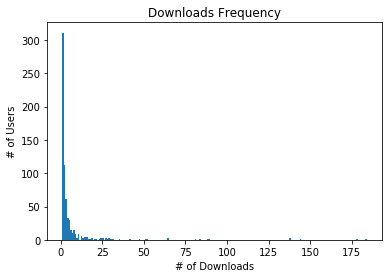

In [7]:

#Let's plot it

plt.hist(user_downloads, 200)
plt.ylabel("# of Users")
plt.xlabel("# of Downloads")
plt.title("Downloads Frequency")
plt.show()


### Can we plot out how many people download from the different publishers?

Can we make a histogram for this data?

In [8]:
#Let's create a new dataframe
pub_downloads = data.groupby("Pub_code").count().sort_values( by = "doi",ascending = False).doi
pub_downloads.head()


Pub_code
340402     275
115799     269
266248     139
1099488    101
721671      81
Name: doi, dtype: int64

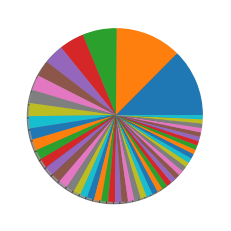

In [20]:

#Let's plot it

plt.pie(pub_downloads[0:50], shadow=True)
#plt.ylabel("")
#plt.xlabel("")
#plt.title("")
plt.show()

### Repeat the exercise using other data filess

(hit the back button to see the files)

`another_city` - and pick the city of your choice

`all_data` - to look at all of the niagara region